In [1]:
import os
from utils import *
import keras.layers.convolutional as convolutional
from keras.models import Sequential
import mn_vgg
reload(mn_vgg)

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


<module 'mn_vgg' from 'mn_vgg.pyc'>

In [2]:
# del matt_model
matt_model = mn_vgg.Mnn16()

In [3]:
current_dir = os.getcwd()
data_dir = current_dir + '/data/kag_dogscats/' #sample/
one_image = data_dir + 'train/cats/cat.10001.jpg'
results_path=data_dir + '/results/'

In [4]:
batch_size = 64
no_of_epochs = 5
train = matt_model.get_batches(data_dir+'train/', batch_size = batch_size)
valid = matt_model.get_batches(data_dir+'valid/', batch_size = batch_size*2)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
matt_model.finetune(train)

In [7]:
matt_model.model.optimizer.lr = 0.01

In [8]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    matt_model.fit(batches=train, val_batches=valid)
    latest_weights_filename = 'ft%d.h5' % epoch
    matt_model.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 583s - loss: 0.3704 - acc: 0.9688 - val_loss: 0.4470 - val_acc: 0.9660
Running epoch: 1
Epoch 1/1
23000/23000 [==============================] - 584s - loss: 0.3278 - acc: 0.9762 - val_loss: 0.2033 - val_acc: 0.9840
Running epoch: 2
Epoch 1/1
23000/23000 [==============================] - 581s - loss: 0.3111 - acc: 0.9783 - val_loss: 0.2461 - val_acc: 0.9835
Running epoch: 3
Epoch 1/1
23000/23000 [==============================] - 581s - loss: 0.3338 - acc: 0.9770 - val_loss: 0.2581 - val_acc: 0.9825
Running epoch: 4
Epoch 1/1
23000/23000 [==============================] - 581s - loss: 0.3339 - acc: 0.9773 - val_loss: 0.2230 - val_acc: 0.9835
Completed 5 fit operations


### Generate Predictions

In [9]:
test_batches, preds = matt_model.test(test_path=data_dir+'test/', batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


In [10]:
filenames = test_batches.filenames

In [11]:
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

In [10]:
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [11]:
subm = matt_model.submission_formatter(filenames, preds, 1, .05, .95)

In [12]:
data_dir

'/home/ubuntu/courses/deeplearning1/nbs/data/kag_dogscats/'

In [13]:
np.savetxt(data_dir+'matt_model_submission1.csv', subm, fmt='%d,%.5f', header='id,label', comments='')

In [15]:
FileLink('data/kag_dogscats/matt_model_submission1.csv')

/home/ubuntu/courses/deeplearning1/nbs/data/kag_dogscats/matt_model_submission1.csv

## Evaluation criteria

[[  1.0000e+00   8.8468e-27]
 [  1.0000e+00   8.3499e-12]]


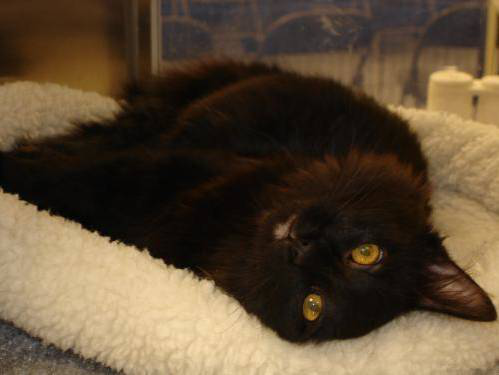

In [134]:
from PIL import Image
print preds[3:5]
Image.open(data_dir+'test/' + filenames[4])

## Mnn_Better

In [8]:
import os
from utils import *
import keras.layers.convolutional as convolutional
from keras.models import Sequential
import mn_vgg
reload(mn_vgg)

<module 'mn_vgg' from 'mn_vgg.py'>

In [12]:
current_dir = os.getcwd()
data_dir = current_dir + '/data/kag_dogscats/' #sample/
# data_dir = current_dir + '/data/kag_dogscats/sample/'
# one_image = data_dir + 'train/cats/cat.10001.jpg'
results_path=data_dir + '/results/'
test_path=data_dir + '/test/'

In [3]:
mnn = mn_vgg.Mnn_Better()
# mnn = mn_vgg.Mnn16()

In [2]:
batch_size = 64
no_of_epochs = 3
train = mnn.mnn_batches(data_dir+'train/', train=True, batch_size = batch_size)
valid = mnn.mnn_batches(data_dir+'valid/', train=False, batch_size = batch_size*2)

NameError: name 'mnn' is not defined

In [5]:
# mnn.mnn_finetuner(train)
mnn.finetune(train)

In [6]:
mnn.model.optimizer.lr = 0.01

In [7]:
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    mnn.fit(train_batches=train, valid_batches=valid)
    latest_weights_filename = 'ft%d.h5' % epoch
    mnn.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 617s - loss: 0.4071 - acc: 0.9633 - val_loss: 0.2089 - val_acc: 0.9830
Running epoch: 1
Epoch 1/1
23000/23000 [==============================] - 618s - loss: 0.4516 - acc: 0.9663 - val_loss: 0.2477 - val_acc: 0.9810
Running epoch: 2
Epoch 1/1
23000/23000 [==============================] - 619s - loss: 0.4156 - acc: 0.9710 - val_loss: 0.3696 - val_acc: 0.9750
Completed 3 fit operations


In [13]:
# test_batches, preds = mnn.test(test_path=data_dir+'test/', batch_size=batch_size*2)
test_batches = mnn.mnn_batches(test_path, train=False, shuffle=False, batch_size=batch_size, class_mode=None)
predictions = mnn.model.predict_generator(test_batches, test_batches.nb_sample)

Found 12500 images belonging to 1 classes.


In [14]:
filenames = test_batches.filenames

In [15]:
save_array(results_path + 'test_predictions.dat', predictions)
save_array(results_path + 'filenames.dat', filenames)

In [ ]:
# predictions = load_array(results_path + 'test_predictions.dat')
# filenames = load_array(results_path + 'filenames.dat')

In [16]:
# subm = mnn.submission_formatter(filenames, preds, 1, .05, .95)
prediction_values = predictions[:,1].clip( min=.055, max=.945 )
ids = np.array([int(f[(f.find('/') + 1):f.find('.')]) for f in filenames])
subm = np.stack([ids,prediction_values], axis=1)

In [21]:
filename = 'matt_model_submission3.csv'
savepath = data_dir+filename
np.savetxt(savepath, subm, fmt='%d,%.5f', header='id,label', comments='')

In [23]:
FileLink(savepath)

/home/ubuntu/courses/deeplearning1/nbs/data/kag_dogscats/matt_model_submission3.csv